## Hate Speech Detection - Milestone 1

In [1]:
#Stuthi Shrisha

### Prelimnary Data Preprocessing

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re
import nltk

In [3]:
#loading the dataset
df = pd.read_csv(r"C:\Users\viole\Desktop\Datasets\Stuthi Shrisha - Kaggle.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
#Unnamed column is removed from the entire dataset
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
#New dataset after removal of column
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
#Checking for null and data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [7]:
#Summarizing the statistical aspects of the dataframe
df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
df['count'].value_counts()

count
3    22807
6     1571
4      211
9      167
7       27
Name: count, dtype: int64

In [9]:
df['hate_speech'].value_counts()

hate_speech
0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: count, dtype: int64

In [10]:
df['offensive_language'].value_counts()

offensive_language
3    13383
2     4246
0     3475
1     2066
6      857
5      369
4      251
9       66
8       37
7       33
Name: count, dtype: int64

In [11]:
df['neither'].value_counts()

neither
0    18892
3     2790
1     1694
2     1200
6      103
5       54
4       35
9        5
8        5
7        5
Name: count, dtype: int64

In [12]:
df['class'].value_counts()
#0 - hate speech, 1 - offensive language, 2 - neither

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

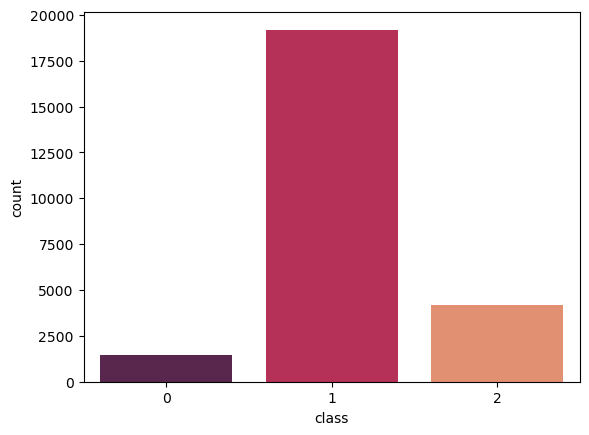

In [13]:
#Division of classes before sampling
sns.countplot(x=df['class'], palette = "rocket")

### Dataset Balancing 

In [14]:
#Balancing of dataframe done to avoid bias
hate_speech = df[df['class'] == 0]
offensive_language = df[df['class'] == 1].sample(n= 1430, random_state = 42)
neither = df[df['class'] == 2].sample(n= 1430, random_state = 42)
df = pd.concat([hate_speech, offensive_language, neither], ignore_index=True)
newlabels = df['class'].value_counts()
print(newlabels)

class
0    1430
1    1430
2    1430
Name: count, dtype: int64


<Axes: xlabel='class', ylabel='count'>

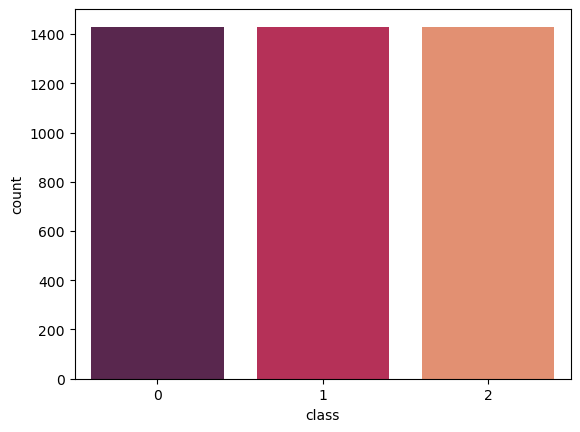

In [15]:
#New dataset after balancing and random sampling
sns.countplot(x=df['class'], palette = "rocket")

### Relation of Tweet Length with Hate Speech Classification

In [16]:
#Understanding the relation between tweet length and final class value
df['tweetlen'] = df['tweet'].str.len()

In [17]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweetlen
0,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",61
1,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",83
2,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",119
3,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",117
4,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",72


<Axes: ylabel='Frequency'>

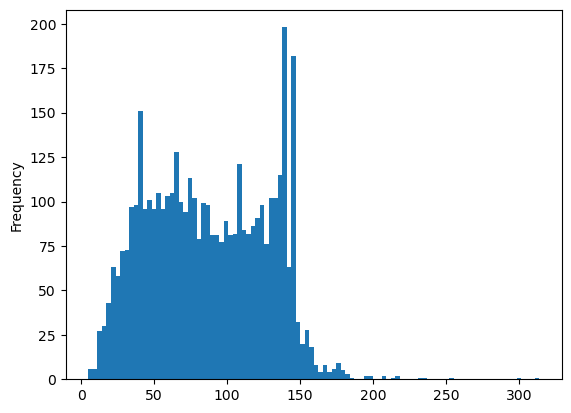

In [18]:
#Vizualization of tweet length with frequency
df['tweetlen'].plot(bins=100, kind="hist")

### Natural Language Processing Techniques applied to Dataset

In [19]:
#Further libraries from nltk imported
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
w = stopwords.words('english')

In [20]:
w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
#text preprocessing function for removal of punctuations except apostrophe, stopwords, lowercasing and special characters
def clean2(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    tokens = re.findall(r'\w+', text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word.strip("'") for word in tokens]
    return tokens

In [22]:
df['tweet'] = df['tweet'].apply(clean2)

In [23]:
#Dataframe after text preprocessing using nltk and regex
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweetlen
0,3,2,1,0,0,"[blackman38tide, whalelookyhere, howdydowdy11,...",61
1,3,3,0,0,0,"[cb_baby24, white_thunduh, alsarabsss, hes, be...",83
2,3,3,0,0,0,"[devilgrimz, vigxrarts, fucking, gay, blacklis...",119
3,3,3,0,0,0,"[markroundtreejr, lmfaoooo, hate, black, peopl...",117
4,3,2,1,0,0,"[nochillpaz, least, nigger, lmfao]",72


In [24]:
#Conversion of class values into dummy variables
df['yeshs'] = df['class'].map({0:1, 1:0, 2:0})
df['yesol'] = df['class'].map({0:0, 1:1, 2:0})
df['yesn'] = df['class'].map({0:0, 1:0, 2:1})

In [25]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweetlen,yeshs,yesol,yesn
0,3,2,1,0,0,"[blackman38tide, whalelookyhere, howdydowdy11,...",61,1,0,0
1,3,3,0,0,0,"[cb_baby24, white_thunduh, alsarabsss, hes, be...",83,1,0,0
2,3,3,0,0,0,"[devilgrimz, vigxrarts, fucking, gay, blacklis...",119,1,0,0
3,3,3,0,0,0,"[markroundtreejr, lmfaoooo, hate, black, peopl...",117,1,0,0
4,3,2,1,0,0,"[nochillpaz, least, nigger, lmfao]",72,1,0,0


In [26]:
#Performing stemming using porterstemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(listl):
    final = []
    for ele in listl:
        a = ps.stem(ele)
        final.append(a)
    return final


In [27]:
df['tweetstem'] = df['tweet'].apply(stemming)

In [28]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweetlen,yeshs,yesol,yesn,tweetstem
0,3,2,1,0,0,"[blackman38tide, whalelookyhere, howdydowdy11,...",61,1,0,0,"[blackman38tid, whalelookyher, howdydowdy11, q..."
1,3,3,0,0,0,"[cb_baby24, white_thunduh, alsarabsss, hes, be...",83,1,0,0,"[cb_baby24, white_thunduh, alsarabsss, he, bea..."
2,3,3,0,0,0,"[devilgrimz, vigxrarts, fucking, gay, blacklis...",119,1,0,0,"[devilgrimz, vigxrart, fuck, gay, blacklist, h..."
3,3,3,0,0,0,"[markroundtreejr, lmfaoooo, hate, black, peopl...",117,1,0,0,"[markroundtreejr, lmfaoooo, hate, black, peopl..."
4,3,2,1,0,0,"[nochillpaz, least, nigger, lmfao]",72,1,0,0,"[nochillpaz, least, nigger, lmfao]"


In [29]:
#Final preprocessed dataframe converted back to csv
features = ['count','hate_speech', 'offensive_language', 'neither', 'class', 'tweet']
cleanedfinal = df[features]
cleanedfinal.head()
#cleanedfinal.to_csv(r'C:\Users\viole\Downloads\cleaned_StuthiShrisha.csv', index=False)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,2,1,0,0,"[blackman38tide, whalelookyhere, howdydowdy11,..."
1,3,3,0,0,0,"[cb_baby24, white_thunduh, alsarabsss, hes, be..."
2,3,3,0,0,0,"[devilgrimz, vigxrarts, fucking, gay, blacklis..."
3,3,3,0,0,0,"[markroundtreejr, lmfaoooo, hate, black, peopl..."
4,3,2,1,0,0,"[nochillpaz, least, nigger, lmfao]"


### TfIdf Vectorization Phase 1: Using Balanced Dataset

In [30]:
#Prelimnary processing before tfidf vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def join_words(text_list):
    return " ".join(text_list)

df['tweetstring'] = df['tweet'].apply(join_words)
X = df['tweetstring']
y = df['class']

#Splitting into training, testing and validation sets
train_data, temp_data, train_labels, temp_labels = train_test_split(X, y, test_size=0.3, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, random_state=42)

tfidf_vectorizer = TfidfVectorizer(lowercase=False)

# Transform the data
X_train = tfidf_vectorizer.fit_transform(train_data)
X_val = tfidf_vectorizer.transform(val_data)
X_test = tfidf_vectorizer.transform(test_data)


In [31]:
X_train

<3003x8919 sparse matrix of type '<class 'numpy.float64'>'
	with 26418 stored elements in Compressed Sparse Row format>

In [32]:
X_val

<643x8919 sparse matrix of type '<class 'numpy.float64'>'
	with 4300 stored elements in Compressed Sparse Row format>

In [33]:
matrix = tfidf_vectorizer.fit_transform(df['tweetstring'])
print(matrix.toarray())
#quick look at how the overall matrix transforms under TfIdf

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
#final matrix dimensions
matrix

<4290x11375 sparse matrix of type '<class 'numpy.float64'>'
	with 37742 stored elements in Compressed Sparse Row format>

In [35]:
#final vectorized dataset with vector names as columns
five = matrix[:5].toarray()
df = pd.DataFrame(five, columns=tfidf_vectorizer.get_feature_names_out())
df.loc[:, (df != 0).any(axis=0)]

,alsarabsss,anyway,beaner,black,blacklisted,blackman38tide,cb_baby24,devilgrimz,fucking,gay,...,niggers,nochillpaz,people,queer,smh,tehgodclan,tell,vigxrarts,whalelookyhere,white_thunduh
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.44459,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.319132,0.000000,0.000000,0.000000,0.000000,0.483217,0.00000
1,0.362305,0.000000,0.280999,0.000000,0.000000,0.00000,0.362305,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.237135,0.000000,0.226984,0.000000,0.000000,0.32402
2,0.000000,0.325792,0.000000,0.000000,0.394163,0.00000,0.000000,0.394163,0.204408,0.253653,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.394163,0.000000,0.394163,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.524914,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.268297,0.00000,0.47991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.59995,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [36]:
#!pip install librosa

In [37]:
#!pip install moviepy